### Khai báo thư viện 

In [1]:
import numpy as np 
import scipy
import pandas as pd # Đọc file CSV, Làm việc với dataframe
import matplotlib.pyplot as plt # Sử dụng cho mục đích trực quan hóa dữ liệu
import seaborn as sns # Trực quan hóa dữ liệu
import statistics
from scipy import stats as st # Kiểm định thống kê
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Đọc dữ liệu csv
df = pd.read_csv('Diem - Diem.csv')
df['Thể thao'] = df['Thể thao'].astype('object')
df["Thể thao"].replace({0:"Không", 1:"Có"}, inplace=True)

In [3]:
# inra 100
df.head(100)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
0,1,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,Không,2.04
1,2,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,Không,2.03
2,3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,Không,2.09
3,4,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,Không,0.00
4,5,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,Không,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,5.03,0.95,430,230,Nữ,Khác,1,0,2.00,Không,0.00
96,97,5.03,0.95,430,230,Nữ,Khác,2,16,2.23,Không,1.93
97,98,5.24,1.08,341,270,Nam,Kinh,1,0,1.92,Không,0.00
98,99,5.24,1.08,341,270,Nam,Kinh,2,12,2.00,Không,1.91


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mã SV             731 non-null    int64  
 1   Điểm TBTN         731 non-null    float64
 2   Tỉ lệ Văn/Toán    731 non-null    float64
 3   Tổng HS           731 non-null    int64  
 4   Hạng PT           731 non-null    int64  
 5   Giới tính         731 non-null    object 
 6   Dân tộc           731 non-null    object 
 7   Học kỳ            731 non-null    int64  
 8   Thời gian tự học  731 non-null    int64  
 9   Điểm giữa kỳ      731 non-null    float64
 10  Thể thao          731 non-null    object 
 11  Điểm cuối kỳ      731 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 68.7+ KB


Dựa vào thông tin mà data.info thu được, ta có thể thấy

Có tất cả 11 cột

4 cột định lượng (float), 6 cột dữ liệu kiểu chữ (int) và 3 cột dữ liệu định tính (Object)


In [5]:
# Set index mã SV
df = df.set_index('Mã SV')
df.head(100)

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
Mã SV,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,Không,2.04
2,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,Không,2.03
3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,Không,2.09
4,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,Không,0.00
5,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,Không,1.78
...,...,...,...,...,...,...,...,...,...,...,...
96,5.03,0.95,430,230,Nữ,Khác,1,0,2.00,Không,0.00
97,5.03,0.95,430,230,Nữ,Khác,2,16,2.23,Không,1.93
98,5.24,1.08,341,270,Nam,Kinh,1,0,1.92,Không,0.00


### Biến định lượng và biến định tính

In [6]:
categorical = []
num_float = []

# Phân loại biến định tính:
for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
    elif df[i].dtype=='float':
        num_float.append(i)

In [7]:
# Biến định tính
categorical 

['Giới tính', 'Dân tộc', 'Thể thao']

In [8]:
# Biến định lượng
num_float

['Điểm TBTN', 'Tỉ lệ Văn/Toán', 'Điểm giữa kỳ', 'Điểm cuối kỳ']

### Sử dụng thống kê mô tả với các biến định lượng

Phương pháp này được sử dụng để mô tả các tính năng cơ bản của các loại dữ liệu linh hoạt trong nghiên cứu. Nó trình bày dữ liệu theo cách có ý nghĩa như vậy mà mô hình trong dữ liệu bắt đầu có ý nghĩa. Tuy nhiên, phân tích mô tả không đi xa hơn việc đưa ra kết luận. Các kết luận một lần nữa dựa trên các nhà nghiên cứu giả thuyết đã đưa ra cho đến nay. Dưới đây là một vài loại phương pháp phân tích mô tả chính

BIỆN PHÁP CỦA XU HƯỚNG TRUNG ƯƠNG


Phương pháp, trung bình, chế độ
Phương pháp này được sử dụng rộng rãi để chứng minh sự phân phối bởi các điểm khác nhau
Các nhà nghiên cứu sử dụng phương pháp này khi họ muốn thể hiện phản ứng phổ biến nhất hoặc mức độ trung bình được chỉ định

####  a) giá trị trung bình(Mean)


In [9]:
# giá trị trung bình
Mean = np.mean(df[num_float])
Mean

Điểm TBTN         6.283543
Tỉ lệ Văn/Toán    0.854802
Điểm giữa kỳ      2.331382
Điểm cuối kỳ      2.080629
dtype: float64

#### b) Trung bình trọng số (Weighted Mean)

In [10]:
# Trung bình trọng số
TBTS = np.average(df[num_float])
TBTS

2.8875889192886457

#### c) Trung vị (Median)

In [11]:
# Trung vị
df[num_float].median()

Điểm TBTN         6.29
Tỉ lệ Văn/Toán    0.84
Điểm giữa kỳ      2.33
Điểm cuối kỳ      2.17
dtype: float64

##### d) Yếu vị (Mode)


In [12]:
# Yếu vị
df[num_float].mode()

,Điểm TBTN,Tỉ lệ Văn/Toán,Điểm giữa kỳ,Điểm cuối kỳ
0,5.73,0.8,2.0,0.0
1,5.94,NaN,NaN,NaN


CÁC BIỆN PHÁP PHÂN TÁN HOẶC BIẾN ĐỔI

*Phạm vi, phương sai, độ lệch chuẩn

*Ở đây trường tương ứng với điểm cao / thấp

*Độ lệch chuẩn phương sai = chênh lệch giữa điểm số quan sát và giá trị trung bình

*Nó được sử dụng để xác định sự lây lan của điểm số bằng cách nêu các khoảng

*Các nhà nghiên cứu sử dụng phương pháp này để giới thiệu dữ liệu dàn trải. Nó giúp họ xác định độ sâu cho đến khi dữ liệu được 

trải ra mà nó ảnh hưởng trực tiếp đến giá trị trung bình.

#### a) Phương sai(Variance)

In [13]:
# Phương sai
var = np.var(df[num_float], ddof=1)
var

Điểm TBTN         1.382670
Tỉ lệ Văn/Toán    0.023597
Điểm giữa kỳ      0.574804
Điểm cuối kỳ      0.980644
dtype: float64

#### b) Độ lệch chuẩn (Standard Deviation)

In [14]:
# Độ lệch chuẩn
Std = np.std(df[num_float], ddof=1)
Std

Điểm TBTN         1.175870
Tỉ lệ Văn/Toán    0.153612
Điểm giữa kỳ      0.758158
Điểm cuối kỳ      0.990275
dtype: float64

#### c) Độ lệch (Skewness)

In [15]:
# Độ lệch 
scipy.stats.skew(df[num_float])

array([-0.06459182,  0.60558883, -0.30906879, -0.79225988])

#### d) Bách phân vị (Percentiles)

In [16]:
# Bách phân vị
Diem_TBTN = np.quantile(df['Điểm TBTN'], [0.25, 0.5, 0.75])
Diem_TBTN

array([5.52, 6.29, 7.13])

In [17]:
TL_Van_Toan = np.quantile(df['Tỉ lệ Văn/Toán'], [0.25, 0.5, 0.75])
TL_Van_Toan

array([0.75, 0.84, 0.94])

In [18]:
Diem_giua_ki = np.quantile(df['Điểm giữa kỳ'], [0.25, 0.5, 0.75])
Diem_giua_ki

array([1.84, 2.33, 2.83])

In [19]:
Điem_cuoi_ki = np.quantile(df['Điểm cuối kỳ'], [0.25, 0.5, 0.75])
Điem_cuoi_ki 

array([1.87 , 2.17 , 2.665])

#### e) các dãy (Ranges)

In [20]:
np.ptp(df['Điểm TBTN'])

6.85

In [21]:
np.ptp(df['Tỉ lệ Văn/Toán'])

0.96

In [22]:
np.ptp(df['Điểm giữa kỳ'])

4.0

In [23]:
np.ptp(df['Điểm cuối kỳ'])

4.0

##### Tóm tắt thống kê mô tả 

In [24]:
scipy.stats.describe(df['Điểm TBTN'], ddof=1, bias=False)


DescribeResult(nobs=731, minmax=(3.15, 10.0), mean=6.283543091655266, variance=1.3826697580720726, skewness=-0.06472470622867112, kurtosis=-0.03183818692077356)

In [25]:
scipy.stats.describe(df['Tỉ lệ Văn/Toán'], ddof=1, bias=False)

DescribeResult(nobs=731, minmax=(0.46, 1.42), mean=0.8548016415868673, variance=0.023596775668534378, skewness=0.6068347505381804, kurtosis=0.8379590905160619)

In [26]:
scipy.stats.describe(df['Điểm giữa kỳ'], ddof=1, bias=False)

DescribeResult(nobs=731, minmax=(0.0, 4.0), mean=2.3313816689466482, variance=0.5748037048141972, skewness=-0.3097046637833898, kurtosis=0.10756221128744503)

In [27]:
scipy.stats.describe(df['Điểm cuối kỳ'], ddof=1, bias=False)

DescribeResult(nobs=731, minmax=(0.0, 4.0), mean=2.0806292749658004, variance=0.9806437130596106, skewness=-0.7938898596386593, kurtosis=0.377079750727745)

#### Phân tích biến định tính

In [28]:
# Xem biến định tính:
df[categorical]

,Giới tính,Dân tộc,Thể thao
Mã SV,,,
1,Nữ,Khác,Không
2,Nam,Kinh,Không
3,Nam,Kinh,Không
4,Nam,Kinh,Không
5,Nam,Kinh,Không
...,...,...,...
727,Nam,Kinh,Có
728,Nam,Kinh,Không
729,Nam,Kinh,Không


##### Biến giới tính

In [29]:
df['Giới tính'].value_counts()

Nam    552
Nữ     179
Name: Giới tính, dtype: int64

In [30]:
gender = pd.DataFrame(df['Giới tính'].value_counts())
gender.reset_index(inplace=True)
gender

,index,Giới tính
0,Nam,552
1,Nữ,179


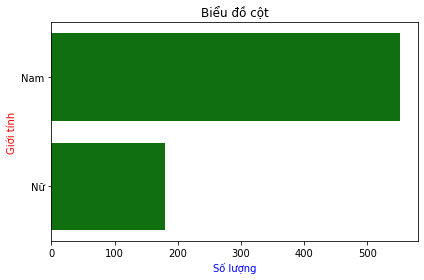

In [31]:
# Barplot:
plot0=sns.barplot(x='Giới tính',y='index',data = gender, color ='g')
plt.title('Biểu đồ cột')
plt.xlabel('Số lượng', color ='b')
plt.ylabel('Giới tính', color ='r')
plt.tight_layout()

#### Biến Dân tộc

In [32]:

ethnic = pd.DataFrame(df['Dân tộc'].value_counts())
ethnic.reset_index(inplace=True)
ethnic

,index,Dân tộc
0,Kinh,554
1,Khác,177


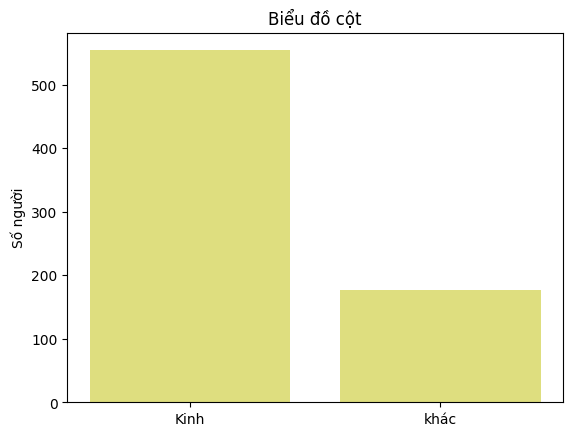

In [33]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Kinh', 'khác')
y_pos = np.arange(len(objects))
performance = [554,177]

plt.bar(y_pos, performance, align='center', alpha=0.5, color ='y')
plt.xticks(y_pos, objects)
plt.ylabel('Số người')
plt.title('Biểu đồ cột')

plt.show()

#### Biến định lượng

In [34]:
# Xem biến định lượng:
df[num_float].head()

,Điểm TBTN,Tỉ lệ Văn/Toán,Điểm giữa kỳ,Điểm cuối kỳ
Mã SV,,,,
1,6.43,0.48,2.25,2.04
2,5.45,0.81,2.20,2.03
3,5.45,0.81,1.60,2.09
4,5.66,0.88,1.60,0.00
5,5.66,0.88,1.29,1.78


#### Vẽ biểu đồ Histogram

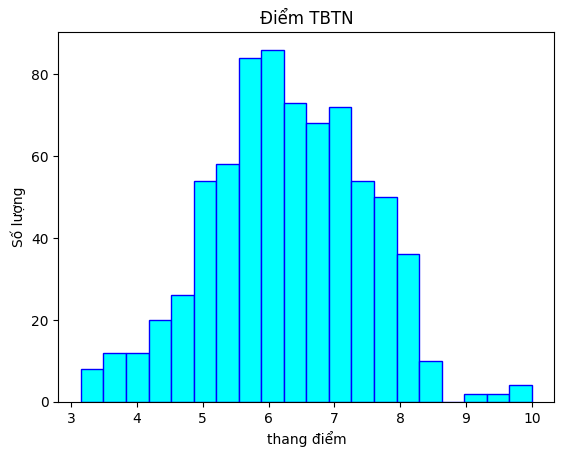

In [35]:
plt.hist(df['Điểm TBTN'], bins='auto', histtype='bar', ec='k', color = 'cyan', edgecolor ='blue') 
plt.xlabel("thang điểm")
plt.ylabel('Số lượng')
plt.title('Điểm TBTN')
plt.show()

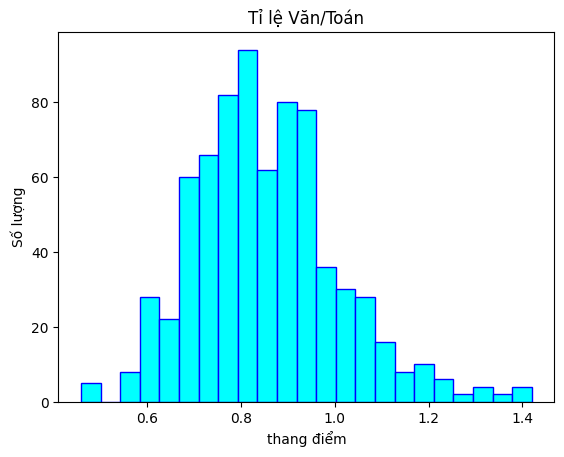

In [36]:
plt.hist(df['Tỉ lệ Văn/Toán'], bins='auto', histtype='bar', ec='k', color = 'cyan', edgecolor ='blue') 
plt.xlabel("thang điểm")
plt.ylabel('Số lượng')
plt.title('Tỉ lệ Văn/Toán')
plt.show()

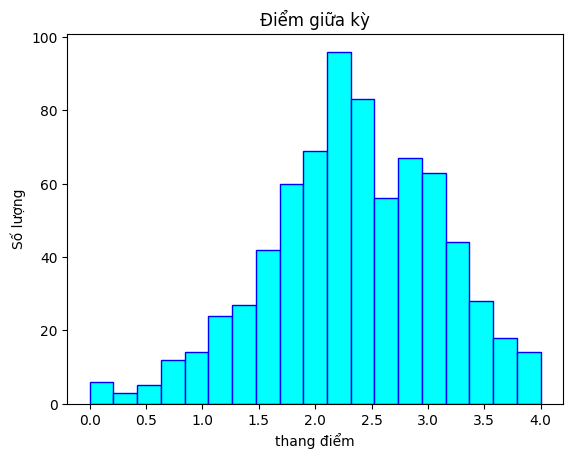

In [37]:
plt.hist(df['Điểm giữa kỳ'], bins='auto', histtype='bar', ec='k', color = 'cyan', edgecolor ='blue') 
plt.xlabel("thang điểm")
plt.ylabel('Số lượng')
plt.title('Điểm giữa kỳ')
plt.show()

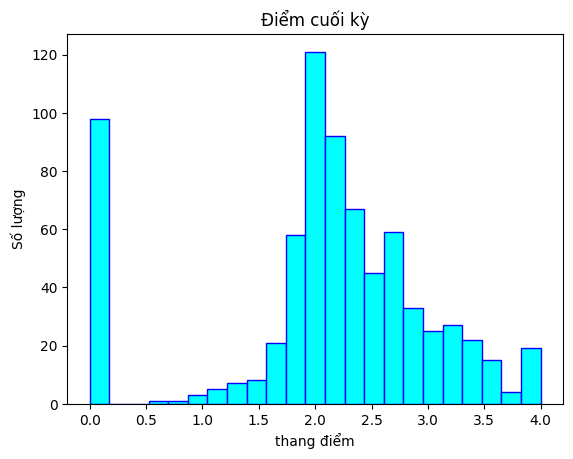

In [38]:
plt.hist(df['Điểm cuối kỳ'], bins='auto', histtype='bar', ec='k', color = 'cyan', edgecolor ='blue') 
plt.xlabel("thang điểm")
plt.ylabel('Số lượng')
plt.title('Điểm cuối kỳ')
plt.show()

##### Coefficient of variation - Ma trận biểu diễn hệ số tương quan

In [39]:
data_mx = df[num_float].corr(method = "pearson")
data_mx

,Điểm TBTN,Tỉ lệ Văn/Toán,Điểm giữa kỳ,Điểm cuối kỳ
Điểm TBTN,1.000000,-0.082919,0.494699,0.151795
Tỉ lệ Văn/Toán,-0.082919,1.000000,-0.060755,-0.105695
Điểm giữa kỳ,0.494699,-0.060755,1.000000,0.325991
Điểm cuối kỳ,0.151795,-0.105695,0.325991,1.000000


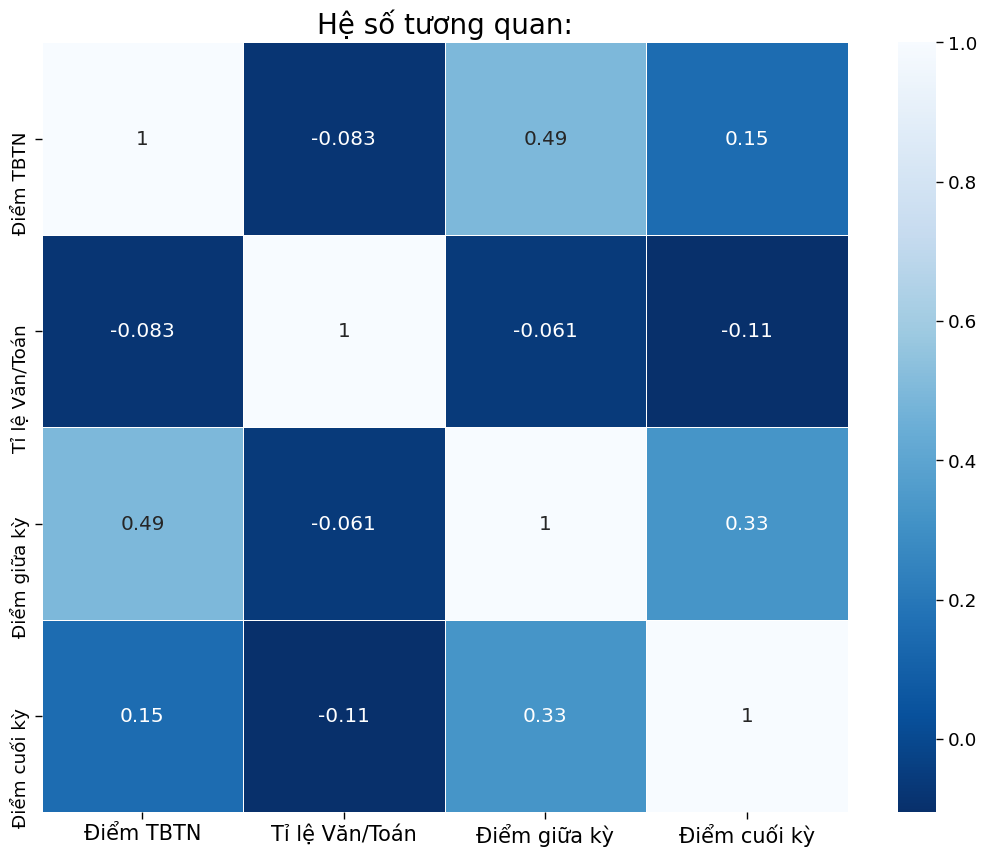

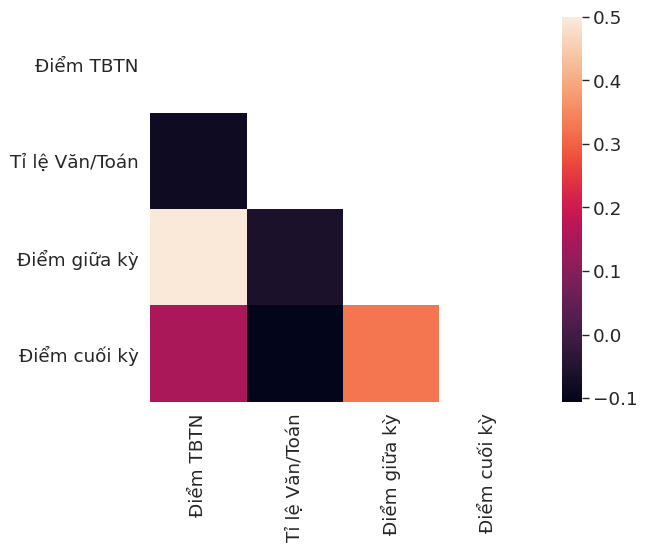

In [40]:
plt.figure(figsize=(13,10))
sns.set_context('paper', font_scale=1.5)
plt.title('Hệ số tương quan:', fontsize=20)
plt.xticks(fontsize=15)
ax = sns.heatmap(data_mx, annot=True, cmap='Blues_r', linewidths=0.5, linecolor='white')
mask = np.zeros_like(data_mx)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(data_mx, mask=mask, vmax=.5, square=True)

##### pairplot

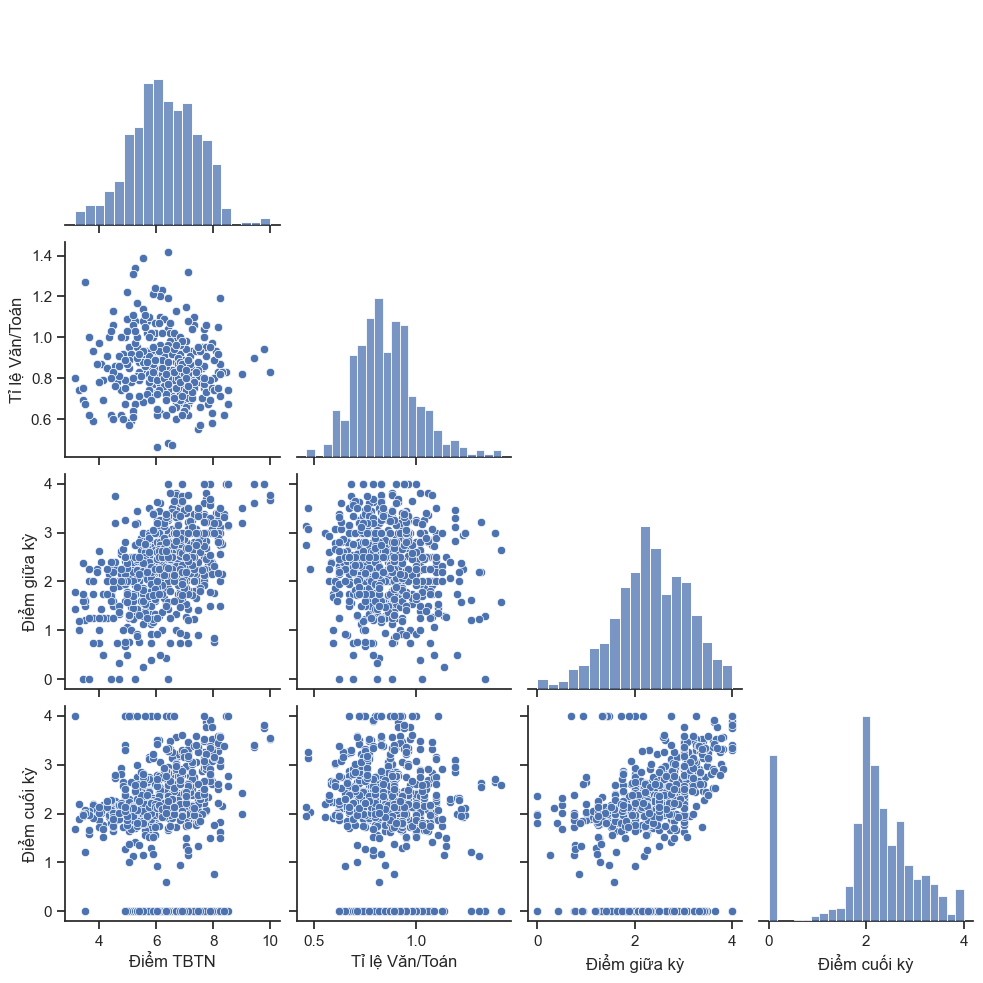

<Figure size 800x800 with 0 Axes>

<Figure size 128x96 with 0 Axes>

In [41]:
sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(df[num_float], corner=True)
plt.figure(figsize=(8,8))
plt.figure(dpi=20)
plt.show()

### T-Test
#### 1.So sánh điểm trung bình cuối kỳ của sinh viên theo giới tính:

**H0**: $\mu_1 = \mu_2$ Điểm cuối kì và giới tính không phụ thuộc lẫn nhau

**H1:** $\mu_1 \ne \mu_2$ Điểm cuối kì và giới tính có phụ thuộc lẫn nhau

Phương pháp t-test được dùng một cách phổ biến để xác định xem liệu giá trị trung bình của một quần thể (the mean of a population) có khác biệt với một giá trị nào đó (gọi là giá trị trung bình giả thuyết – a hypothesized mean) hoặc với giá trị trung bình của một quần thể khác.

##### thực hiện kiểm định T-test với Giới tính và Điểm cuối kỳ

In [58]:
gr1 = df[df['Giới tính']=='Nam'].sample(30)['Điểm cuối kỳ']
gr1.name='Nam'
m1 = np.mean(gr1)
gr2 = df[df['Giới tính']=='Nữ'].sample(30)['Điểm cuối kỳ']
gr2.name='Nữ'
m2 = np.mean(gr2)
#Dt = pd.concat([gr1, gr2], axis=1).head()
#Dt

In [59]:
#Sử dụng kiểm định ttest
std1, p1 = scipy.stats.ttest_ind(gr1, gr2)
print(std1, p1)
print("-"*50)
alpha = 0.05
if p1 < alpha:
    print('Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng Điểm thi cuối kì và Giới tính là có phụ thuộc vào nhau.')
else:
    print('Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng Điểm thi cuối kì và Giới tính là không phụ thuộc vào nhau.')

-0.3943719266709629 0.6947528543756464
--------------------------------------------------
Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng Điểm thi cuối kì và Giới tính là không phụ thuộc vào nhau.


In [60]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(gr1,
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(gr2,
                       density= True,
                       alpha=0.75)


plt.suptitle("Phân bố điểm thi cuối kì \n between Males and Females", fontsize= 20)
plt.xlabel("Điểm thi cuối kì", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.text(133, .025,
         f"$\mu= {gr1.mean(): .1f}, \ \sigma= {gr1.std(): .1f}$")
plt.text(160, .025,
         f"$\mu= {gr2.mean(): .1f}, \ \sigma= {gr2.std(): .1f}$")


plt.show()

##### Thực hiện kiểm định T-test với Điểm cuối kì và thể thao
**H0**: $\mu_1 = \mu_2$ Điểm cuối kì và Thể thao không phụ thuộc lẫn nhau

**H1:** $\mu_1 \ne \mu_2$ Điểm cuối kì và Thể thao có phụ thuộc lẫn nhau

In [64]:
gr1 = df[df['Thể thao']=='Không'].sample(30)['Điểm cuối kỳ']
gr1.name='Có chơi Thể thao'
m1 = np.mean(gr1)
gr2 = df[df['Thể thao']=='Có'].sample(30)['Điểm cuối kỳ']
gr2.name='không chơi thể thao'
m2 = np.mean(gr2)

In [65]:
#Sử dụng kiểm định ttest
std1, p1 = scipy.stats.ttest_ind(gr1, gr2)
print(std1, p1)
print("-"*50)
alpha = 0.05
if p1 < alpha:
    print('Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng Điểm thi cuối kì và Thể thao là có phụ thuộc vào nhau.')
else:
    print('Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng Điểm thi cuối kì và Thể thao là không phụ thuộc vào nhau.')

0.4917256496195825 0.6247691922840702
--------------------------------------------------
Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng Điểm thi cuối kì và Thể thao là không phụ thuộc vào nhau.


In [66]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(gr1,
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(gr2,
                       density= True,
                       alpha=0.75)


plt.suptitle("Phân bố điểm thi cuối kì \n between có chơi thể thao và không chơi thể thao", fontsize= 20)
plt.xlabel("Điểm thi cuối kì", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.text(133, .025,
         f"$\mu= {gr1.mean(): .1f}, \ \sigma= {gr1.std(): .1f}$")
plt.text(160, .025,
         f"$\mu= {gr2.mean(): .1f}, \ \sigma= {gr2.std(): .1f}$")


plt.show()

### Chisquare


Kiểm định Chi bình phương được sử dụng khi chúng ta muốn đánh giá xem liệu có mối quan hệ giữa hai biến định tính hay biến phân loại (categorical variables) trong một tập dữ liệu hay không. 

In [67]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]


1. Nghiên cứu mối liên hệ về mặt thống kê của các biến gender với điểm cuối kì (chuyển điểm về A, B, C, D, F )

Phân loại điểm cuối kì

In [89]:
# Phân loại "Điểm cuối kỳ":
new2 = df[['Giới tính','Điểm cuối kỳ']]
bins = []
for x in new2['Điểm cuối kỳ']:
  if x < 1.0: bins.append("F")
  elif 1 <= x <= 1.7: bins.append("D")
  elif 1.7 < x <= 2.7:bins.append("C")
  elif 2.7 < x <= 3.7: bins.append("B")
  else : bins.append("A")
new2['LetterGrade']=bins
new2

,Giới tính,Điểm cuối kỳ,LetterGrade
Mã SV,,,
1,Nữ,2.04,C
2,Nam,2.03,C
3,Nam,2.09,C
4,Nam,0.00,F
5,Nam,1.78,C
...,...,...,...
727,Nam,2.21,C
728,Nam,2.44,C
729,Nam,2.35,C


**Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của giới tính đến LetterGrade.**

Phát biểu giả thiết:

- $H_0$: Giới tính không ảnh hưởng đến xếp loại học lực (LetterGrade).
- $H_1$: Giới tính ảnh hưởng đến xếp loại học lực (LetterGrade).

In [74]:
grade = pd.crosstab(index=new2['Giới tính'], columns=new2['LetterGrade'])
grade

LetterGrade,A,B,C,D,F
Giới tính,,,,,
Nam,18,77,353,31,73
Nữ,5,71,71,3,29


In [75]:
from scipy import stats as st
score, p_value, dof, expected = st.chi2_contingency(grade)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,63.355508,5.711872e-13,4,Chấp nhận H1 với mức ý nghĩa 0.05


Kỹ thuật EDA

In [121]:
Nam = new2[new2['Giới tính']== 'Nam']
Nữ = new2[new2['Giới tính']== 'Nữ']

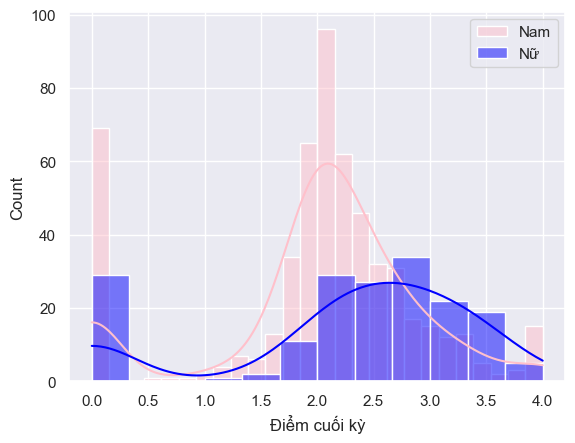

In [123]:
sns.set(style="darkgrid")
sns.histplot(data=Nam, x="Điểm cuối kỳ", color="pink", label="Nam", kde=True)
sns.histplot(data=Nữ, x="Điểm cuối kỳ", color="blue", label="Nữ", kde=True)
plt.legend()
plt.show()

***Kết luận:*** Về mặt thống kê, Giới tính ảnh hưởng đến xếp loại học lực (LetterGrade) với mức ý nghĩa 5%.

2.Nghiên cứu mối liên hệ về mặt thống kê của các biến gender với thời gian tự học (chuyển điểm về [Thấp', 'Trung bình', 'Nhiều', 'Rất nhiều'])

Phân loại thời gian tự học

In [76]:
bins = [-1, 14, 44, 74, 135]
new = df[['Giới tính','Thời gian tự học']]
new['StudyHours'] = pd.cut(new['Thời gian tự học'], bins, labels = ['Thấp', 'Trung bình', 'Nhiều', 'Rất nhiều'])
new.head()

,Giới tính,Thời gian tự học,StudyHours
Mã SV,,,
1,Nữ,43,Trung bình
2,Nam,28,Trung bình
3,Nam,43,Trung bình
4,Nam,0,Thấp
5,Nam,14,Thấp


Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của Giới tính đến StudyHours.**

Phát biểu giả thiết:

- $H_0$: Giới tính không ảnh hưởng đến thời gian học tập.
- $H_1$: Giới tính ảnh hưởng đến thời gian học tập.

In [78]:
hours = pd.crosstab(index=new['Giới tính'], columns=new['StudyHours'])
hours

StudyHours,Thấp,Trung bình,Nhiều,Rất nhiều
Giới tính,,,,
Nam,121,166,135,130
Nữ,42,56,30,51


In [79]:
score, p_value, dof, expected = st.chi2_contingency(hours)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,5.090003,0.165324,3,Chấp nhận H0 với mức ý nghĩa 0.05


In [125]:
Nam1 = new[new['Giới tính'] == 'Nam']
Nữ1 = new[new['Giới tính'] == 'Nữ']

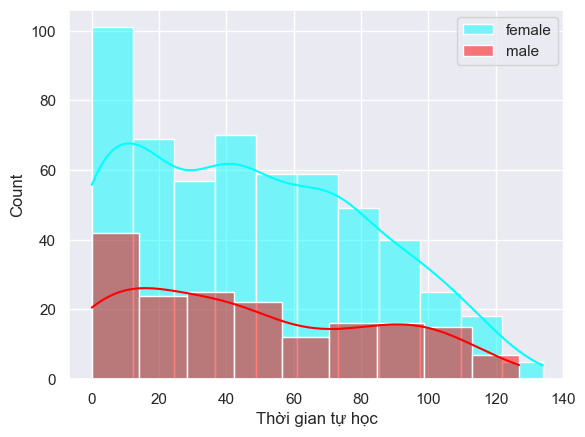

In [126]:
sns.set(style="darkgrid")
sns.histplot(data=Nam1, x="Thời gian tự học", color="cyan", label="female", kde=True)
sns.histplot(data=Nữ1, x="Thời gian tự học", color="red", label="male", kde=True)
plt.legend()
plt.show()

#### ***Kết luận: Về mặt thống kê, Giới tính không ảnh hưởng đến thời gian học tập (StudyHours) với mức ý nghĩa 5%.***

**________________________**

### Có nhận định cho rằng thời gian tự học (StudyHours) có ảnh hưởng đến kết quả LetterGrade.

**Hãy kiểm chứng nhận định trên (có thể dùng Chi2 test) với mức ý nghĩa 5%.**

Phát biểu giả thiết:

- $H_0$: Thời gian tự học (StudyHours) không ảnh hưởng đến xếp loại học lực (LetterGrade).
- $H_1$: Thời gian tự học (StudyHours) ảnh hưởng đến xếp loại học lực (LetterGrade).

In [96]:
#Gộp 2 dataframe lại với nhau
new3 = pd.concat([new[['StudyHours']], new2[['LetterGrade']]], axis=1)
new3

,StudyHours,LetterGrade
Mã SV,,
1,Trung bình,C
2,Trung bình,C
3,Trung bình,C
4,Thấp,F
5,Thấp,C
...,...,...
727,Rất nhiều,C
728,Trung bình,C
729,Trung bình,C


In [98]:
# tạo một dataframe mới để tiến hành kiểm định
grade = pd.crosstab(index=new3['StudyHours'], columns=new3['LetterGrade'])
grade

LetterGrade,A,B,C,D,F
StudyHours,,,,,
Thấp,14,12,23,15,99
Trung bình,4,56,147,12,3
Nhiều,2,33,126,4,0
Rất nhiều,3,47,128,3,0


In [99]:
# tiến hành kiểm định
score, p_value, dof, expected = st.chi2_contingency(grade)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,452.221122,3.188022e-89,12,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, Thời gian tự học(StudyHours) ảnh hưởng đến xếp loại học lực (LetterGrade) với mức ý nghĩa 5%

### Có nhận định cho rằng điểm kiểm tra giữa kỳ có ảnh hưởng đến điểm thi cuối kỳ.

**Hãy kiểm chứng nhận xét trên với độ tin cậy 95%.**

Phát biểu giả thiết:

- $H_0$: Xếp loại học lực giữa kỳ không ảnh hưởng đến xếp loại học lực (LetterGrade).
- $H_1$: Xếp loại học lực giữa kỳ ảnh hưởng đến xếp loại học lực (LetterGrade).

In [100]:
giuaky = df[['Điểm giữa kỳ']]
bins = []
for x in df['Điểm giữa kỳ']:
  if x < 1.0: bins.append("F")
  elif 1 <= x <= 1.7: bins.append("D")
  elif 1.7 < x <= 2.7:bins.append("C")
  elif 2.7 < x <= 3.7: bins.append("B")
  else : bins.append("A")
giuaky['Điểm giữa kỳ']=bins
giuaky = pd.concat([giuaky, new2[['LetterGrade']]], axis=1)
giuaky

,Điểm giữa kỳ,LetterGrade
Mã SV,,
1,C,C
2,C,C
3,D,C
4,D,F
5,D,C
...,...,...
727,B,C
728,C,C
729,C,C


In [101]:
# Điểm học kì1
giuaky = pd.crosstab(index=giuaky['Điểm giữa kỳ'], columns=giuaky['LetterGrade'])
giuaky

LetterGrade,A,B,C,D,F
Điểm giữa kỳ,,,,,
A,5,11,0,0,3
B,7,104,80,6,24
C,4,32,257,13,51
D,5,1,68,9,17
F,2,0,19,6,7


In [102]:
score, p_value, dof, expected = st.chi2_contingency(giuaky)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,244.487241,6.979232e-43,16,Chấp nhận H1 với mức ý nghĩa 0.05


***Kết luận:*** Về mặt thống kê, Xếp loại học lực giữa kỳ 1 ảnh hưởng đến xếp loại học lực cuối kỳ (LetterGrade) với mức ý nghĩa 5%.

### ANOVA

QUY TRÌNH PHÂN TÍCH ANOVA MỘT CHIỀU

Kiểm tra các giả định:

- Các mẫu độc lập với nhau
- Các mẫu có cùng phương sai
- Các mẫu đều tuân theo phân phối chuẩn

Xây dựng giả thuyết

$$H_{0}: \mu_{0} = \mu_{1} = ... = \mu_{n}$$
$$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$$

Giá trị thống kê F được sử dụng trong việc ra quyết định của phân tích ANOVA một chiều. Công thức tính như sau:

$$F = \frac{MS_{B}}{MS_{W}}$$

với:

- $MS_{B} = \frac{\sum_{k}n_{k}(\overline{\rm x_{k}} - \overline{\rm x})^{2}}{k - 1}$
- $MS_{W} = \frac{\sum_{k}n_{i,k}( x_{i,k} - \overline{\rm x})^{2}}{k - 1}$

Loại bỏ giả thuyết $H_{0}$ khi chỉ số F > chỉ số F-critical (hoặc giá trị p tương ứng < 0.05!!!???)

In [103]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
      
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();   
    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()
        a = [0.25,0.5,0.75]
        b = self.data.quantile(a)
        c = pd.DataFrame(b,a)
        print(c)
        print('-'*50)
    def shapiro(self):
        print('Kiểm định Shapori:')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu tuân theo phân phối chuẩn')
        else:
            print('Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý: Dữ liệu không tuân theo luật phân phối chuẩn')
            print('-'*10)
            print('Do đó không thể chạy kiểm định ANOVA 1 chiều.')
        print('-'*50)

In [104]:
df['Phân loại'] = df["Giới tính"].astype(str) + ' - '+ df["Dân tộc"]
df

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,Phân loại
Mã SV,,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,Không,2.04,Nữ - Khác
2,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,Không,2.03,Nam - Kinh
3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,Không,2.09,Nam - Kinh
4,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,Không,0.00,Nam - Kinh
5,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,Không,1.78,Nam - Kinh
...,...,...,...,...,...,...,...,...,...,...,...,...
727,8.18,0.75,177,53,Nam,Kinh,2,76,2.80,Có,2.21,Nam - Kinh
728,7.06,0.84,322,168,Nam,Kinh,1,27,2.20,Không,2.44,Nam - Kinh
729,7.06,0.84,322,168,Nam,Kinh,2,42,2.50,Không,2.35,Nam - Kinh


In [105]:
data3 = df[['Phân loại', 'Điểm cuối kỳ']]
data3

,Phân loại,Điểm cuối kỳ
Mã SV,,
1,Nữ - Khác,2.04
2,Nam - Kinh,2.03
3,Nam - Kinh,2.09
4,Nam - Kinh,0.00
5,Nam - Kinh,1.78
...,...,...
727,Nam - Kinh,2.21
728,Nam - Kinh,2.44
729,Nam - Kinh,2.35


In [106]:
a = data3.rename(columns={"Phân loại": "Types", "Điểm cuối kỳ": "Score"})
#del a['Điểm cuối kỳ']
a

,Types,Score
Mã SV,,
1,Nữ - Khác,2.04
2,Nam - Kinh,2.03
3,Nam - Kinh,2.09
4,Nam - Kinh,0.00
5,Nam - Kinh,1.78
...,...,...
727,Nam - Kinh,2.21
728,Nam - Kinh,2.44
729,Nam - Kinh,2.35


##### Tạo cột nữ_khác

In [137]:
Nu_khac = data3[data3['Phân loại']== 'Nữ - Khác']
Nu_khac1 =Nu_khac['Điểm cuối kỳ']
Nu_khac1

Mã SV
1      2.04
12     2.12
13     1.87
96     0.00
97     1.93
146    0.00
147    2.85
188    0.00
189    3.50
206    2.03
207    2.04
534    0.00
535    2.14
560    0.00
561    2.13
594    2.00
595    1.97
598    0.00
599    1.76
610    2.01
611    2.13
616    2.72
617    2.79
650    0.00
651    2.14
662    0.00
663    1.86
694    0.00
695    1.73
696    3.36
697    3.25
704    2.10
705    1.95
722    0.00
723    2.77
730    0.00
731    2.50
Name: Điểm cuối kỳ, dtype: float64

##### Tạo cột Nam_khác

In [139]:
Nam_khac = data3[data3['Phân loại']== 'Nam - Khác']
Nam_khac1 =Nam_khac['Điểm cuối kỳ']
Nam_khac1

Mã SV
10     0.00
11     1.16
18     1.97
19     1.90
22     2.01
       ... 
645    1.38
652    0.00
653    0.94
724    2.05
725    2.13
Name: Điểm cuối kỳ, Length: 140, dtype: float64

##### Tạo cột Nữ_kinh

In [140]:
Nu_kinh = data3[data3['Phân loại']== 'Nữ - Kinh']
Nu_kinh
Nu_kinh1 =Nu_khac['Điểm cuối kỳ']
Nu_kinh1

Mã SV
1      2.04
12     2.12
13     1.87
96     0.00
97     1.93
146    0.00
147    2.85
188    0.00
189    3.50
206    2.03
207    2.04
534    0.00
535    2.14
560    0.00
561    2.13
594    2.00
595    1.97
598    0.00
599    1.76
610    2.01
611    2.13
616    2.72
617    2.79
650    0.00
651    2.14
662    0.00
663    1.86
694    0.00
695    1.73
696    3.36
697    3.25
704    2.10
705    1.95
722    0.00
723    2.77
730    0.00
731    2.50
Name: Điểm cuối kỳ, dtype: float64

#### Tạo cột Nam_Kinh

In [141]:
Nam_kinh = data3[data3['Phân loại']== 'Nam - Kinh']
Nam_kinh1 =Nam_khac['Điểm cuối kỳ']
Nam_kinh1

Mã SV
10     0.00
11     1.16
18     1.97
19     1.90
22     2.01
       ... 
645    1.38
652    0.00
653    0.94
724    2.05
725    2.13
Name: Điểm cuối kỳ, Length: 140, dtype: float64

KIỂM TRA GIẢ ĐỊNH

SỰ ĐỘC LẬP

Giả định này được kiểm tra khi nghiên cứu được thiết kế. Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau, tức là một cá nhân chỉ có thể thuộc về một nhóm. Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). Trong ví dụ này, điều kiện này được đáp ứng.

Xây dựng giả thuyết

$$H_{0}: \mu{1} = \mu{2} =\mu{3} =\mu{4} =\mu{5} $$$$H_{a}: \text{Có ít nhất một cặp giá trị trung bình có giá trị khác nhau}$$


Xây dựng giả thuyết kiểm định Bartlett:

$H_{0}: \text{Phương sai các nhóm tương đồng nhau.}$

$H_{a}: \text{Phương sai các nhóm không tương đồng nhau.}$

In [143]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(Nam_khac1, Nu_khac1, Nam_kinh1, Nu_kinh1)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)


Kiểm định Bartlett:
BartlettResult(statistic=18.02175233248197, pvalue=0.00043532929153686386)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------
